# Decision Tree Regression

### Importing libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

### Loading the dataset

In [9]:
data = pd.read_csv('../dataset/spotify_features.csv', sep=',')
data.head()

,track_popularity,instrumentalness,duration_ms,energy,acousticness,album_month,danceability,loudness,liveness,genre_code,valence,artist_code,speechiness
0,67.0,0.004210,162600.0,0.815,0.0724,12,0.726,-4.969,0.35700,2,0.693000,4535,0.106983
1,70.0,0.000023,176616.0,0.931,0.0794,7,0.675,-3.432,0.19031,2,0.613000,7724,0.074200
2,60.0,0.000009,169093.0,0.930,0.0287,7,0.718,-3.778,0.20400,2,0.509838,6862,0.102000
3,62.0,0.000000,187675.0,0.856,0.1870,7,0.449,-4.788,0.17600,2,0.152000,3635,0.062300
4,58.0,0.000005,207894.0,0.923,0.1460,6,0.679,-6.500,0.12400,2,0.752000,2056,0.181000


### Data preprocessing

In [10]:
X = data.drop(columns=['track_popularity'])
y = data['track_popularity']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (11908, 12), (11908,)
Validation set: (3970, 12), (3970,)
Test set: (3970, 12), (3970,)


### Model training

In [11]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('dtr', DecisionTreeRegressor(max_depth=6, random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dtr', DecisionTreeRegressor(max_depth=6, random_state=42))])

### Model evaluation

In [12]:
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

print(f"Train R^2: {train_score:.2f}")
print(f"Validation R^2: {val_score:.2f}")
print(f"Test R^2: {test_score:.2f}")

mae = mean_absolute_error(y_test, model.predict(X_test))
print(f"Mean Absolute Error: {mae:.2f}")
mse = mean_squared_error(y_test, model.predict(X_test))
print(f"Mean Squared Error: {mse:.2f}")

Train R^2: 0.13
Validation R^2: 0.06
Test R^2: 0.05
Mean Absolute Error: 19.36
Mean Squared Error: 565.19


### Cross-validation

In [13]:
scores = cross_validate(model, X, y, cv=6, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.065081,0.001507,-0.043132,0.111585
1,0.061599,0.000503,-0.110141,0.132094
2,0.059736,0.002509,-0.093688,0.130069
3,0.061390,0.002001,0.006921,0.108368
4,0.084178,0.002001,-0.126679,0.136728
5,0.114709,0.002000,-0.060615,0.095951


### Visualizations

#### Feature importance

In [14]:
feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

#### Predicted vs Actual

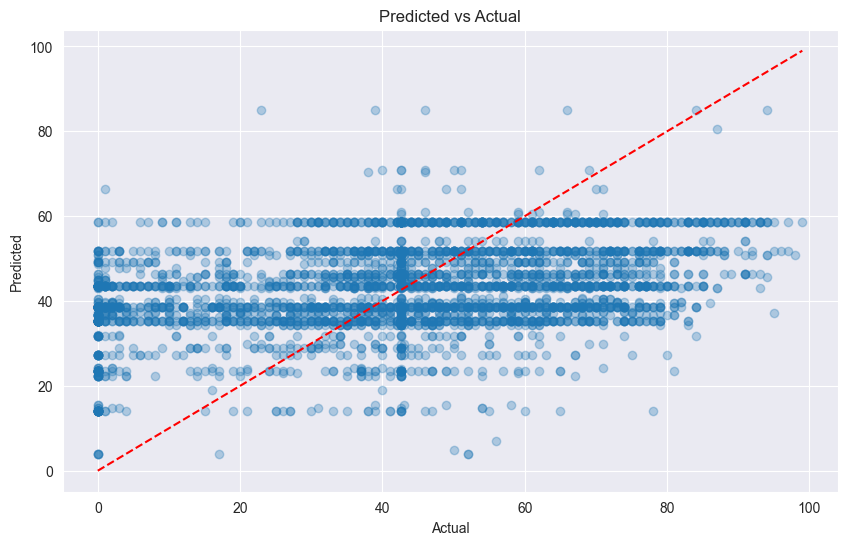

In [22]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

#### Residual plot

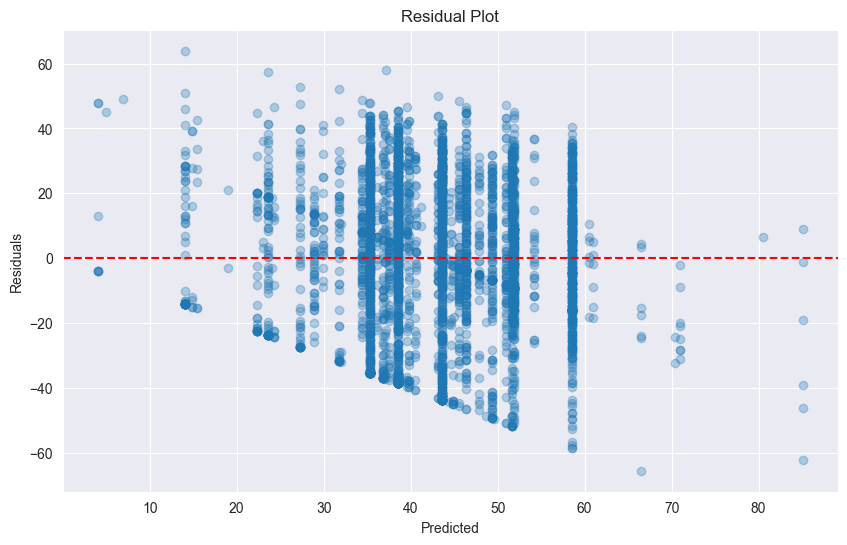

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()